# Sentimental Analysis by using Fraud Email Dataset

# About Dataset


This dataset  contains 11929 rows and 2 Columns, 
Column names are text and class, 
Text has String values and class have binary values. 

In [1]:
#importing the library
import pandas as pd

In [4]:
#importing the dataset
data = pd.read_csv ("I:/fraud_email_.csv")
data

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
11924,Travel well. I'll look forward to hearing your...,0
11925,"Dear friend, I wish to begin by way of introdu...",1
11926,Follow Up Flag: Follow upFlag Status: FlaggedM...,0
11927,sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...,0


In [5]:
data.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [6]:
# counting the class value from dataset
data.Class.value_counts(normalize = True)*100

0    56.51773
1    43.48227
Name: Class, dtype: float64

In [7]:
# joining class of dataset to text of dataset
text = ' '.join(map(str,data.Text.tolist()))

In [8]:
#importing the libraries
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

text = text.lower()

tokenized_words = word_tokenize(text)

stop_words=stopwords.words("english")

punctuations = list(string.punctuation)

In [9]:
stop_punc_list = stop_words + punctuations

In [10]:
filtered_tokens = [word for word in tokenized_words if word not in stop_punc_list]

In [11]:
fd = FreqDist(filtered_tokens)

fd.most_common(10)

[('money', 10988),
 ('--', 10835),
 ('br', 9981),
 ('bank', 8642),
 ('account', 8088),
 ("'s", 8082),
 ('nbsp', 7967),
 ('us', 7693),
 ("''", 6898),
 ('business', 4924)]

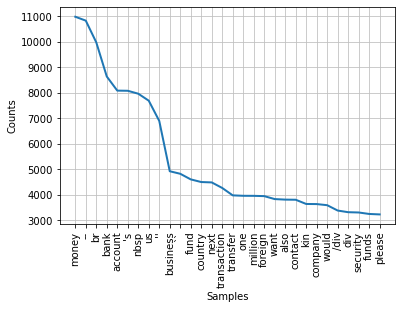

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
fd.plot(30,cumulative=False)

In [13]:
#Using of wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

def word_cloud(title_, text):
    """ Create WorldCloud """
    stopword_list = set(STOPWORDS) 

    wordcloud = WordCloud(width = 400, height = 200, 
                    background_color ='white', 
                    stopwords = stopword_list, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title_, fontsize=20)
    plt.show() 

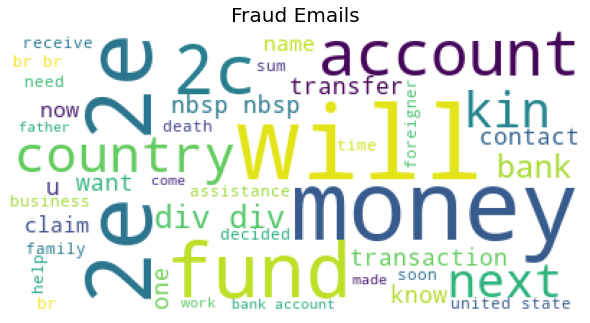

In [14]:
word_cloud("Fraud Emails", text)

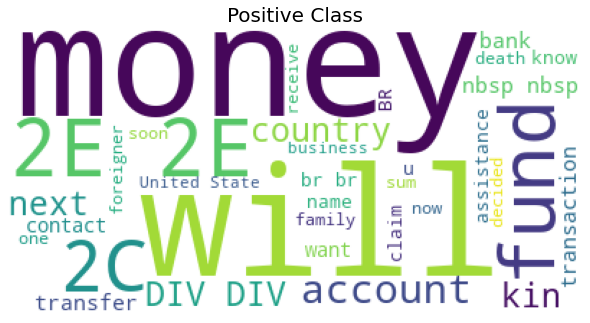

In [15]:
# Positive Class
paragraph=' '.join(map(str,data[data.Class==1].Text.tolist()))
word_cloud("Positive Class", paragraph)

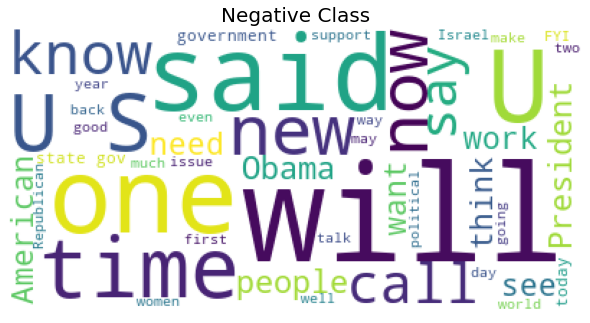

In [16]:
# Negative Reviews
paragraph=' '.join(data[data.Class==0].Text.tolist())
word_cloud("Negative Class", paragraph)

In [26]:
# training or testing of data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    data['Class'], 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [27]:
#Using of Logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [28]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.989103101424979, 0.9973208305425318, 0.9770341207349081)

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9863090248672813, 0.9842416283650689, 0.9835958005249343)

In [39]:
#Using Multi nomianal Naive bayse
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9796032411288069, 0.9653624118024374, 0.9875328083989501)

In [38]:
# using Multilayer Perceptron
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9913383626711372, 1.0, 0.9796587926509186)

In [37]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9796032411288069, 0.9732550554468362, 0.979002624671916)

In [36]:
# Using SVM
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9404861693210393, 0.9947169811320755, 0.8648293963254593)

In [35]:
# Using AddaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9835149483095836, 0.9880079946702198, 0.9730971128608924)

# Conclusion

At the by compairing the various methods of classification and regression I found that the accuracy of the logistic Regression is very higher than the other Classificaion Or Regression model. 